<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [5]:
## Write your code here
duplicate_rows = df[df.duplicated()]

# Count number of duplicate rows
num_duplicates = df.duplicated().sum()

print("Number of duplicate rows:", num_duplicates)

# Display first few duplicate rows (if any)
duplicate_rows.head()

df_cleaned = df.drop_duplicates()

# Verify removal by counting duplicates again
num_duplicates_after = df_cleaned.duplicated().sum()

print("Number of duplicate rows after removal:", num_duplicates_after)

# Check new shape of dataset
print("Shape after removing duplicates:", df_cleaned.shape)

Number of duplicate rows: 0
Number of duplicate rows after removal: 0
Shape after removing duplicates: (65437, 114)


### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [6]:
## Write your code here
# Count missing values in CodingActivities
missing_coding = df['CodingActivities'].isnull().sum()
print("Number of missing values in CodingActivities:", missing_coding)

# Optional: show % of missing values
percent_missing = (missing_coding / len(df)) * 100
print(f"Percentage missing in CodingActivities: {percent_missing:.2f}%")


Number of missing values in CodingActivities: 10971
Percentage missing in CodingActivities: 16.77%


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [8]:
## Write your code here
# Impute missing values in CodingActivities using forward-fill
df['CodingActivities'] = df['CodingActivities'].ffill()

# Verify no missing values remain
print("Number of missing values after imputation:", df['CodingActivities'].isnull().sum())


Number of missing values after imputation: 0


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [9]:
## Write your code here
# Identify columns that may contain compensation-related data
comp_columns = [col for col in df.columns if "Comp" in col or "Salary" in col or "Pay" in col]
print("Compensation-related columns found:", comp_columns)

# Explore the ConvertedCompYearly column (if it exists)
if "ConvertedCompYearly" in df.columns:
    print("\nSummary statistics for ConvertedCompYearly:")
    print(df["ConvertedCompYearly"].describe())
    print("\nNumber of missing values:", df["ConvertedCompYearly"].isnull().sum())


Compensation-related columns found: ['CompTotal', 'AIComplex', 'ConvertedCompYearly']

Summary statistics for ConvertedCompYearly:
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

Number of missing values: 42002


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [10]:
## Write your code here
# Ensure there are no missing values before scaling
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(0)

# Apply Min-Max Scaling
df['ConvertedCompYearly_MinMax'] = (
    (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].min()) /
    (df['ConvertedCompYearly'].max() - df['ConvertedCompYearly'].min())
)

# Display first few rows to confirm
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head())


   ConvertedCompYearly  ConvertedCompYearly_MinMax
0                  0.0                         0.0
1                  0.0                         0.0
2                  0.0                         0.0
3                  0.0                         0.0
4                  0.0                         0.0


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [11]:
## Write your code here
# Fill missing values (if any) with 0 before normalization
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(0)

# Apply Z-score normalization
df['ConvertedCompYearly_Zscore'] = (
    (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].mean()) /
    df['ConvertedCompYearly'].std()
)

# Show first few rows
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].head())


   ConvertedCompYearly  ConvertedCompYearly_Zscore
0                  0.0                   -0.258956
1                  0.0                   -0.258956
2                  0.0                   -0.258956
3                  0.0                   -0.258956
4                  0.0                   -0.258956


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


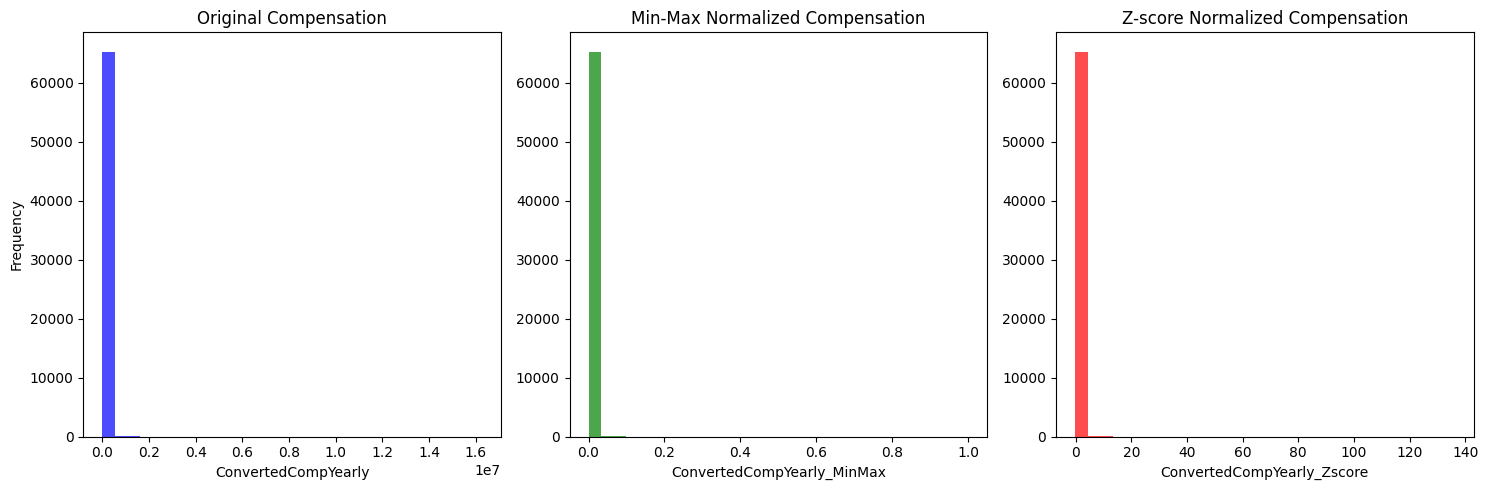

In [12]:
## Write your code here

plt.figure(figsize=(15, 5))

# Original
plt.subplot(1, 3, 1)
plt.hist(df['ConvertedCompYearly'], bins=30, color='blue', alpha=0.7)
plt.title('Original Compensation')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')

# Min-Max Normalized
plt.subplot(1, 3, 2)
plt.hist(df['ConvertedCompYearly_MinMax'], bins=30, color='green', alpha=0.7)
plt.title('Min-Max Normalized Compensation')
plt.xlabel('ConvertedCompYearly_MinMax')

# Z-score Normalized
plt.subplot(1, 3, 3)
plt.hist(df['ConvertedCompYearly_Zscore'], bins=30, color='red', alpha=0.7)
plt.title('Z-score Normalized Compensation')
plt.xlabel('ConvertedCompYearly_Zscore')

plt.tight_layout()
plt.show()


### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
